In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('habermanaaic.csv')
df

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [ ]:
print(df.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


Here, we have 4 attributes out of which 3 of those - age, year and nodes- are what is being used to determine the relation between them and the survival time of the patient who has undergone surgery.
Nodes- It means the lymph nodes cancer has affected from the main breast tumor. It basically means the higher number of axillary nodes one has, the more serious is their cancer.
Status - It means the survival status of a patient where '1 = the patient survived 5 years or longer ; 2 = the patient died within 5 years.

In [ ]:
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

We can see that patients have mostly lived longer than 5 or more years after the surgery and that's 225 out of 306 people. However, 81 people could only survive less than 5 years.  

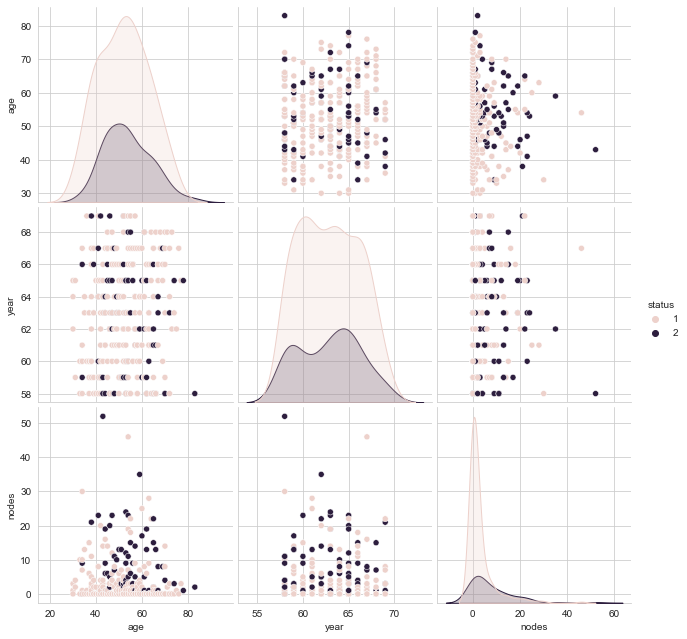

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(df,hue = "status",height=3);
plt.show()

As it can be seen, the features 'age' and 'nodes' can be used to conclude their relevance on a person's survival rate. Though they are not exactly easily seperable, we can generate some insights. 


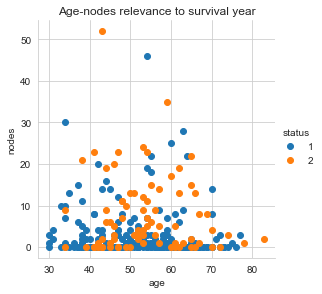

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", height=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title("Age-nodes relevance to survival year")
plt.show();

Now we have elaborated the 'age-nodes' plot. We can see from the plot that when a patient has zero nodes, after surgery their survival becomes more probable to 5 or 5+ years. And when the number of nodes increase their survival rate decreases. The affect of 'age' is not as much as that of 'nodes' but however given the context, a patients age can affect their body's ability to survive. 

In [ ]:
df['age'].corr(df['nodes'])

-0.06317610238980065

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


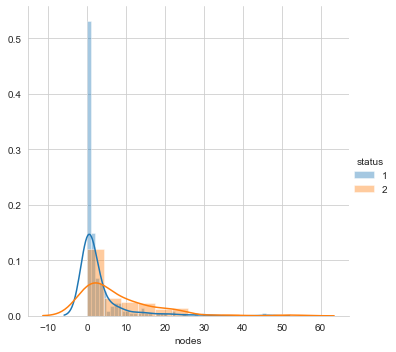

In [ ]:
sns.FacetGrid(df, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

Here, it can be seen that we have more cases of 5+ years survival with 0 or closer nodes. The same goes for 5> years with highest density between intervals 0 & 4.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


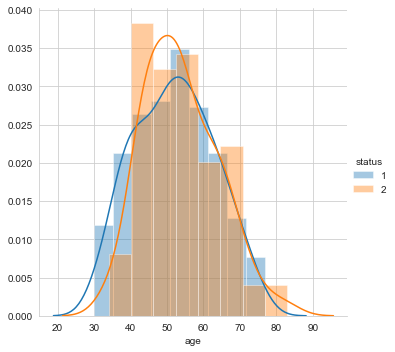

In [ ]:
sns.FacetGrid(df, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


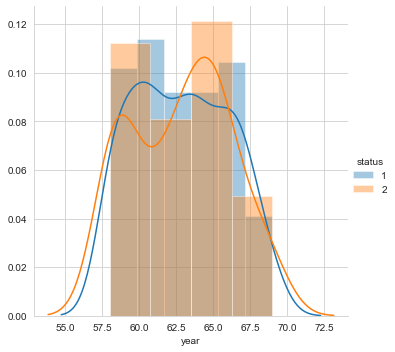

In [ ]:
sns.FacetGrid(df, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

In [ ]:
df = pd.read_csv('habermanaaic.csv',index_col='status')
df

,age,year,nodes
status,,,
1,30,64,1
1,30,62,3
1,30,65,0
1,31,59,2
1,31,65,4
...,...,...,...
1,75,62,1
1,76,67,0
1,77,65,3


In [ ]:
status_more5 = df.loc[1];
status_less5 = df.loc[2];
print(status_more5)
print(status_less5)

        age  year  nodes
status                  
1        30    64      1
1        30    62      3
1        30    65      0
1        31    59      2
1        31    65      4
...     ...   ...    ...
1        73    68      0
1        74    63      0
1        75    62      1
1        76    67      0
1        77    65      3

[225 rows x 3 columns]
        age  year  nodes
status                  
2        34    59      0
2        34    66      9
2        38    69     21
2        39    66      0
2        41    60     23
...     ...   ...    ...
2        70    58      4
2        72    63      0
2        74    65      3
2        78    65      1
2        83    58      2

[81 rows x 3 columns]


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


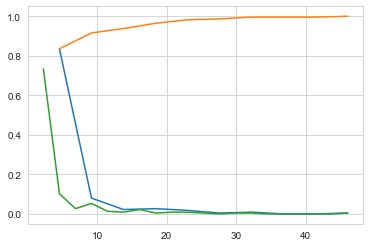

In [ ]:
counts, bin_edges = np.histogram(status_more5['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(status_more5["nodes"], bins = 20, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


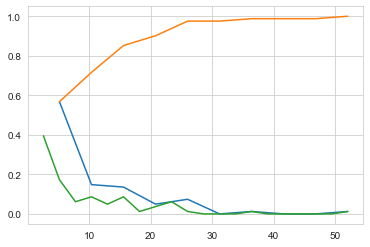

In [ ]:
counts, bin_edges = np.histogram(status_less5['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(status_less5["nodes"], bins = 20, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

In [ ]:
print("Mean of 'nodes'")
print(np.mean(status_more5["nodes"]))
print(np.mean(status_less5["nodes"]))

Mean of 'nodes'
2.7911111111111113
7.45679012345679


Here, it's seen that the mean value of nodes for patients surviving more than 5 years is 2.7911111111111113 which is very less compared to that of survival less than 5 years i.e., 7.45679012345679. Hence, this only adds to our previous observations that nodes have greater affect at one's survival due to their severity. 

In [ ]:
print("Mean of 'age'")
print(np.mean(status_more5["age"]))
print(np.mean(status_less5["age"]))

Mean of 'age'
52.01777777777778
53.67901234567901


Age does not have much of difference to draw any such conclusion.

In [ ]:
print(np.std(status_more5["nodes"]))
print(np.std(status_less5["nodes"]))

5.857258449412131
9.128776076761632


From this it can be concluded that the average deviation from mean value is a lot which depicts that the data is distributed across a wide range of interval. 

In [ ]:
print(np.median(status_more5["nodes"]))
print(np.median(status_less5["nodes"]))
print(np.median(status_less5["age"]))

0.0
4.0
53.0


The central value (median) seems close to 0.0 for 5< years and that of 5>years is 4.0. As the median is less than mean it can be concluded that the distrubution is positively skewed.

In [ ]:
from statsmodels import robust
print(robust.mad(status_more5["nodes"]))
print(robust.mad(status_less5["nodes"]))

0.0
5.930408874022408


In [ ]:
print(np.percentile(status_more5["nodes"],np.arange(0,100,25)))
print(np.percentile(status_less5["nodes"],np.arange(0,100,25)))

[0. 0. 0. 3.]
[ 0.  1.  4. 11.]


In [ ]:
print(np.percentile(status_more5["nodes"],90))
print(np.percentile(status_less5["nodes"],90))

8.0
20.0


In [ ]:
df1 = pd.read_csv('habermanaaic.csv')
df1

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


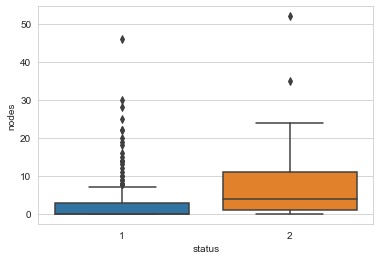

In [ ]:
sns.boxplot(x='status',y='nodes',data=df1)
plt.show()

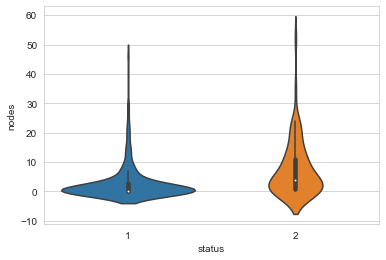

In [ ]:
sns.violinplot(x="status", y="nodes", data=df1, size=8)
plt.show()

So, now we can see that the plot is wider for class 1 around 0. So, it means that there is more density there.